# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# Plot inline
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [ ]:
# Make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Review the response data from the API call
print(json.dumps(btc_response, indent = 4, sort_keys = True))

In [ ]:
# Make an API call to access the current price of ETH
eth_response = requests.get(eth_url).json()

# Review the response data from the API call
print(json.dumps(eth_response, indent = 4, sort_keys = True))

In [12]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price of Bitcoin is ${btc_price:.0f}")

The current price of Bitcoin is $21158


In [11]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price of Ethereum is ${eth_price:.0f}")

The current price of Ethereum is $1160


In [14]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of the holding in BTC
print(f"The value of the Bitcoin holding is ${btc_value:.2f}")

The value of the BTC holding is $25389.60


In [15]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of the holding in ETH
print(f"The value of the Ethereum holding is ${eth_value:.2f}")

The value of the Ethereum holding is $6146.20


In [16]:
# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

# Print the current cryptocurrency wallet balance
print(f"The current value of the entire crypto wallet is ${total_crypto_wallet:.2f}")

The current value of the entire crypto wallet is $31535.80


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In [17]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio
spy_shares = 110
agg_shares = 200

In [23]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "V2"
)

In [36]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Set the start and end date
start_date = pd.Timestamp("2022-06-23", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-06-23", tz="America/New_York").isoformat()


In [37]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Use .head() to verify
prices_df.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-06-23 04:00:00+00:00  376.69  378.83  372.89  378.06  78643521   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-06-23 04:00:00+00:00      623105  376.219755  101.25  101.76  101.125   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-23 04:00:00+00:00  101.21  7760715       25697  101.363615

In [38]:
# Access the closing price for AGG from the Alpaca DataFrame and convert to float
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"The closing price of AGG is ${agg_close_price:.2f}")


The closing price of AGG is $101.21


In [39]:
# Access the closing price for SPY from the Alpaca DataFrame and convert to float
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"The closing price of SPY is ${spy_close_price:.2f}")

The closing price of SPY is $378.06


In [40]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is ${agg_value:.2f}")

The current value of the bond portfolio is $20242.00


In [41]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${spy_value:.2f}")

The current value of the stock portfolio is $41586.60


In [42]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The total value of the stock & bond portion of the portfolio is ${total_stocks_bonds:.2f}")

The total value of the stock & bond portion of the portfolio is $61828.60


In [43]:
# Calculate the total value of the member's entire savings portfolio
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print the total value of the member's entire savings portfolio
print(f"The value of the entire portfolio is ${total_portfolio:.2f}")

The value of the entire portfolio is $93364.40


### Evaluate the Emergency Fund

In [44]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)    

[31535.798, 61828.6]


In [45]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns = ["amount"],
    index = ["crypto", "stock/bond"]
)

# Display the savings_df DataFrame
savings_df

,amount
crypto,31535.798
stock/bond,61828.600


<AxesSubplot:title={'center':'Breakdown of Savings Portfolio'}, ylabel='amount'>

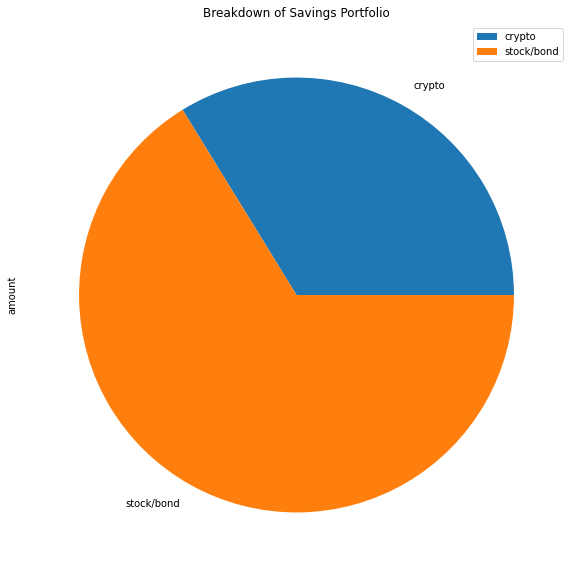

In [60]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(title="Breakdown of Savings Portfolio", figsize=(15, 10), y="amount")

In [49]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

In [50]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
emergency_fund_difference = emergency_fund_value - total_portfolio

if total_portfolio > emergency_fund_value:
    print("Congratulations! You have more than enough savings to fund your emergency portfolio!")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You've reached an important financial goal and have enough funds for your emergency portfolio.")
else:
    print(f"Almost there! Looks like you are ${emergency_fund_difference} away from being able to fund your emergency portfolio")

Congratulations! You have more than enough savings to fund your emergency portfolio!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In [52]:
# Set start and end dates of 3 years back from current date
start_date_carlo = pd.Timestamp("2019-06-23", tz="America/New_York").isoformat()
end_date_carlo = pd.Timestamp("2022-06-23", tz="America/New_York").isoformat()

In [55]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
carlo_three_year_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date_carlo,
    end = end_date_carlo
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = carlo_three_year_data[carlo_three_year_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = carlo_three_year_data[carlo_three_year_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
carlo_three_year_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Verify data
carlo_three_year_data

SPY                                        \
                             open     high       low   close     volume   
timestamp                                                                 
2019-06-24 04:00:00+00:00  294.18  294.580  293.4700  293.64   47610730   
2019-06-25 04:00:00+00:00  293.67  293.730  290.6400  290.76   82344336   
2019-06-26 04:00:00+00:00  291.78  292.310  290.3450  290.47   52064906   
2019-06-27 04:00:00+00:00  291.29  292.060  290.8900  291.50   40484164   
2019-06-28 04:00:00+00:00  292.57  293.550  292.0100  293.00   59508955   
...                           ...      ...       ...     ...        ...   
2022-06-16 04:00:00+00:00  370.54  370.940  364.0799  366.65  134508514   
2022-06-17 04:00:00+00:00  365.43  369.380  362.1700  365.86  109255759   
2022-06-21 04:00:00+00:00  371.90  376.525  371.8100  375.07   76966205   
2022-06-22 04:00:00+00:00  370.68  378.720  370.1800  374.39   89625876   
2022-06-23 04:00:00+00:00  376.69  378.830  372.8900  378.06   78643521   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2019-06-24 04:00:00+00:00      203286  293.971447  111.23  111.3766  111.2200   
2019-06-25 04:00:00+00:00      301447  292.000459  111.36  111.4400  111.2200   
2019-06-26 04:00:00+00:00      226135  291.035618  111.29  111.3100  111.0600   
2019-06-27 04:00:00+00:00      185583  291.584832  111.25  111.4100  111.1633   
2019-06-28 04:00:00+00:00      246484  292.797839  111.36  111.4684  111.3200   
...                               ...         ...     ...       ...       ...   
2022-06-16 04:00:00+00:00      906307  368.466260   99.24  100.3600   99.1432   
2022-06-17 04:00:00+00:00      821350  366.263193  100.42  100.5700   99.9800   
2022-06-21 04:00:00+00:00      578265  374.376305  100.02  100.2600   99.7900   
2022-06-22 04:00:00+00:00      604343  375.146941  100.67  100.9296  100.6650   
2022-06-23 04:00:00+00:00      623105  376.219755  101.25  101.7600  101.1250   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-06-24 04:00:00+00:00  111.32  3079794       16767  111.300802  
2019-06-25 04:00:00+00:00  111.34  3111092       14344  111.364505  
2019-06-26 04:00:00+00:00  111.09  3703224       13654  111.151757  
2019-06-27 04:00:00+00:00  111.40  2963646       14735  111.338162  
2019-06-28 04:00:00+00:00  111.35  9887791       19668  111.395360  
...                           ...      ...         ...         ...  
2022-06-16 04:00:00+00:00  100.35  9328681       33998   99.905633  
2022-06-17 04:00:00+00:00  100.34  9891839       26374  100.372650  
2022-06-21 04:00:00+00:00   99.94  7769462       24356   99.992280  
2022-06-22 04:00:00+00:00  100.79  9430887       30103  100.802688  
2022-06-23 04:00:00+00:00  101.21  7760715       25697  101.363615  

[757 rows x 14 columns]

In [57]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns with 60/40 split
MC_60_40_split_30_year = MCSimulation(
    portfolio_data = carlo_three_year_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# Review the simulation input data
MC_60_40_split_30_year.portfolio_data

SPY                                        \
                             open     high       low   close     volume   
timestamp                                                                 
2019-06-24 04:00:00+00:00  294.18  294.580  293.4700  293.64   47610730   
2019-06-25 04:00:00+00:00  293.67  293.730  290.6400  290.76   82344336   
2019-06-26 04:00:00+00:00  291.78  292.310  290.3450  290.47   52064906   
2019-06-27 04:00:00+00:00  291.29  292.060  290.8900  291.50   40484164   
2019-06-28 04:00:00+00:00  292.57  293.550  292.0100  293.00   59508955   
...                           ...      ...       ...     ...        ...   
2022-06-16 04:00:00+00:00  370.54  370.940  364.0799  366.65  134508514   
2022-06-17 04:00:00+00:00  365.43  369.380  362.1700  365.86  109255759   
2022-06-21 04:00:00+00:00  371.90  376.525  371.8100  375.07   76966205   
2022-06-22 04:00:00+00:00  370.68  378.720  370.1800  374.39   89625876   
2022-06-23 04:00:00+00:00  376.69  378.830  372.8900  378.06   78643521   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-24 04:00:00+00:00      203286  293.971447          NaN  111.23   
2019-06-25 04:00:00+00:00      301447  292.000459    -0.009808  111.36   
2019-06-26 04:00:00+00:00      226135  291.035618    -0.000997  111.29   
2019-06-27 04:00:00+00:00      185583  291.584832     0.003546  111.25   
2019-06-28 04:00:00+00:00      246484  292.797839     0.005146  111.36   
...                               ...         ...          ...     ...   
2022-06-16 04:00:00+00:00      906307  368.466260    -0.033096   99.24   
2022-06-17 04:00:00+00:00      821350  366.263193    -0.002155  100.42   
2022-06-21 04:00:00+00:00      578265  374.376305     0.025174  100.02   
2022-06-22 04:00:00+00:00      604343  375.146941    -0.001813  100.67   
2022-06-23 04:00:00+00:00      623105  376.219755     0.009803  101.25   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2019-06-24 04:00:00+00:00  111.3766  111.2200  111.32  3079794       16767   
2019-06-25 04:00:00+00:00  111.4400  111.2200  111.34  3111092       14344   
2019-06-26 04:00:00+00:00  111.3100  111.0600  111.09  3703224       13654   
2019-06-27 04:00:00+00:00  111.4100  111.1633  111.40  2963646       14735   
2019-06-28 04:00:00+00:00  111.4684  111.3200  111.35  9887791       19668   
...                             ...       ...     ...      ...         ...   
2022-06-16 04:00:00+00:00  100.3600   99.1432  100.35  9328681       33998   
2022-06-17 04:00:00+00:00  100.5700   99.9800  100.34  9891839       26374   
2022-06-21 04:00:00+00:00  100.2600   99.7900   99.94  7769462       24356   
2022-06-22 04:00:00+00:00  100.9296  100.6650  100.79  9430887       30103   
2022-06-23 04:00:00+00:00  101.7600  101.1250  101.21  7760715       25697   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-24 04:00:00+00:00  111.300802          NaN  
2019-06-25 04:00:00+00:00  111.364505     0.000180  
2019-06-26 04:00:00+00:00  111.151757    -0.002245  
2019-06-27 04:00:00+00:00  111.338162     0.002791  
2019-06-28 04:00:00+00:00  111.395360    -0.000449  
...                               ...          ...  
2022-06-16 04:00:00+00:00   99.905633     0.002397  
2022-06-17 04:00:00+00:00  100.372650    -0.000100  
2022-06-21 04:00:00+00:00   99.992280    -0.003986  
2022-06-22 04:00:00+00:00  100.802688     0.008505  
2022-06-23 04:00:00+00:00  101.363615     0.004167  

[757 rows x 16 columns]

In [58]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_split_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/majidkouki/Desktop/fintech_workspace/fintech_challenges/c5-financial-planning-tools/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998561,1.007223,0.993038,0.997932,1.001971,1.005858,0.994268,0.992866,1.010005,1.003267,...,1.000144,1.008213,1.015626,1.002981,1.006822,0.992649,1.014717,0.990689,0.994518,0.995898
2,0.984823,1.012748,1.004866,0.998700,1.006687,1.008904,1.006924,0.986734,0.994500,0.999164,...,0.996818,0.986490,1.022822,1.010621,1.005180,1.000599,1.008482,0.995204,0.994319,0.992104
3,0.985377,1.020766,0.997073,1.000850,0.999177,1.009300,1.008894,0.968470,0.988995,1.008711,...,0.999758,0.983573,1.011756,1.014794,1.010001,0.994857,0.998511,0.995873,1.001485,1.007137
4,0.981831,1.009503,1.006839,0.998735,1.001947,1.003156,1.007321,0.966592,0.992624,0.989985,...,1.002669,0.987000,1.008095,1.022339,1.011342,1.014828,0.996755,0.993555,1.012147,0.992359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.614632,3.235658,3.340547,1.302290,1.865771,1.546580,2.809898,2.734264,4.910185,9.034425,...,1.146041,6.356823,4.428123,1.304417,3.306404,5.565100,12.191282,4.245799,2.196749,3.125161
7557,0.608355,3.246132,3.342058,1.307853,1.869574,1.526502,2.806625,2.708703,4.982167,9.089090,...,1.136940,6.456380,4.380006,1.326152,3.313268,5.636713,12.120704,4.308567,2.215954,3.173032
7558,0.612858,3.209514,3.393051,1.319898,1.851619,1.527243,2.795253,2.730269,5.032824,8.948777,...,1.130454,6.478105,4.382189,1.315742,3.303713,5.641314,11.937320,4.309519,2.243925,3.207268
7559,0.618388,3.205083,3.384412,1.306480,1.858359,1.529661,2.784751,2.755680,5.039374,8.988124,...,1.137714,6.409617,4.426090,1.328110,3.286661,5.570025,11.992571,4.276444,2.202713,3.212442


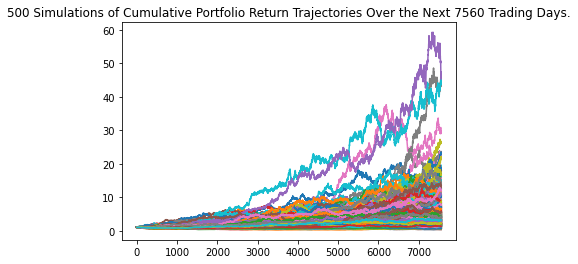

In [72]:
# Visualize the 30-year Monte Carlo simulation with a line plot
MC_sim_line_plot_643 = MC_60_40_split_30_year.plot_simulation()

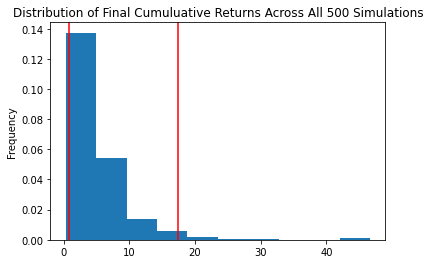

In [73]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation
MC_sim_distribution_643 = MC_60_40_split_30_year.plot_distribution()

In [74]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
MC_summary_stats_643 = MC_60_40_split_30_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_summary_stats_643)

count           500.000000
mean              5.133547
std               5.131949
min               0.323024
25%               2.115196
50%               3.824457
75%               6.187760
max              46.625109
95% CI Lower      0.761759
95% CI Upper     17.413116
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

In [68]:
# Print the current balance of the stock and bond portion of the portfolio
print(f"The total value of the stock & bond portion of the portfolio is ${total_stocks_bonds:.2f}")

The total value of the stock & bond portion of the portfolio is $61828.60


In [84]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_stats_643[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_stats_643[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the stock and bond portion of the portfolio with a weight of 60/40 over the next 30 years will end in the range of ${ci_lower_thirty_cumulative_return_643:.2f} and ${ci_upper_thirty_cumulative_return_643:.2f}")

There is a 95% chance that the stock and bond portion of the portfolio with a weight of 60/40 over the next 30 years will end in the range of $47098.52 and $1076628.59


### Forecast Cumulative Returns in 10 Years

In [78]:
# Configure the Monte Carlo simulation to forecast 10 years cumulative returns with 80/20 split
MC_80_20_split_10_year = MCSimulation(
    portfolio_data = carlo_three_year_data,
    weights = [.80, .20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

# Review the simulation input data
MC_80_20_split_10_year.portfolio_data

SPY                                        \
                             open     high       low   close     volume   
timestamp                                                                 
2019-06-24 04:00:00+00:00  294.18  294.580  293.4700  293.64   47610730   
2019-06-25 04:00:00+00:00  293.67  293.730  290.6400  290.76   82344336   
2019-06-26 04:00:00+00:00  291.78  292.310  290.3450  290.47   52064906   
2019-06-27 04:00:00+00:00  291.29  292.060  290.8900  291.50   40484164   
2019-06-28 04:00:00+00:00  292.57  293.550  292.0100  293.00   59508955   
...                           ...      ...       ...     ...        ...   
2022-06-16 04:00:00+00:00  370.54  370.940  364.0799  366.65  134508514   
2022-06-17 04:00:00+00:00  365.43  369.380  362.1700  365.86  109255759   
2022-06-21 04:00:00+00:00  371.90  376.525  371.8100  375.07   76966205   
2022-06-22 04:00:00+00:00  370.68  378.720  370.1800  374.39   89625876   
2022-06-23 04:00:00+00:00  376.69  378.830  372.8900  378.06   78643521   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-24 04:00:00+00:00      203286  293.971447          NaN  111.23   
2019-06-25 04:00:00+00:00      301447  292.000459    -0.009808  111.36   
2019-06-26 04:00:00+00:00      226135  291.035618    -0.000997  111.29   
2019-06-27 04:00:00+00:00      185583  291.584832     0.003546  111.25   
2019-06-28 04:00:00+00:00      246484  292.797839     0.005146  111.36   
...                               ...         ...          ...     ...   
2022-06-16 04:00:00+00:00      906307  368.466260    -0.033096   99.24   
2022-06-17 04:00:00+00:00      821350  366.263193    -0.002155  100.42   
2022-06-21 04:00:00+00:00      578265  374.376305     0.025174  100.02   
2022-06-22 04:00:00+00:00      604343  375.146941    -0.001813  100.67   
2022-06-23 04:00:00+00:00      623105  376.219755     0.009803  101.25   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2019-06-24 04:00:00+00:00  111.3766  111.2200  111.32  3079794       16767   
2019-06-25 04:00:00+00:00  111.4400  111.2200  111.34  3111092       14344   
2019-06-26 04:00:00+00:00  111.3100  111.0600  111.09  3703224       13654   
2019-06-27 04:00:00+00:00  111.4100  111.1633  111.40  2963646       14735   
2019-06-28 04:00:00+00:00  111.4684  111.3200  111.35  9887791       19668   
...                             ...       ...     ...      ...         ...   
2022-06-16 04:00:00+00:00  100.3600   99.1432  100.35  9328681       33998   
2022-06-17 04:00:00+00:00  100.5700   99.9800  100.34  9891839       26374   
2022-06-21 04:00:00+00:00  100.2600   99.7900   99.94  7769462       24356   
2022-06-22 04:00:00+00:00  100.9296  100.6650  100.79  9430887       30103   
2022-06-23 04:00:00+00:00  101.7600  101.1250  101.21  7760715       25697   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-24 04:00:00+00:00  111.300802          NaN  
2019-06-25 04:00:00+00:00  111.364505     0.000180  
2019-06-26 04:00:00+00:00  111.151757    -0.002245  
2019-06-27 04:00:00+00:00  111.338162     0.002791  
2019-06-28 04:00:00+00:00  111.395360    -0.000449  
...                               ...          ...  
2022-06-16 04:00:00+00:00   99.905633     0.002397  
2022-06-17 04:00:00+00:00  100.372650    -0.000100  
2022-06-21 04:00:00+00:00   99.992280    -0.003986  
2022-06-22 04:00:00+00:00  100.802688     0.008505  
2022-06-23 04:00:00+00:00  101.363615     0.004167  

[757 rows x 16 columns]

In [79]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_80_20_split_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/majidkouki/Desktop/fintech_workspace/fintech_challenges/c5-financial-planning-tools/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996436,1.005412,1.017137,1.004527,1.008476,1.013814,0.998004,1.006580,0.993259,0.981628,...,0.989990,0.992493,0.990488,0.991093,0.994734,1.001969,0.971616,1.005447,1.000693,0.996525
2,0.986831,1.017739,1.019724,0.993686,1.034603,0.999465,1.000598,1.022188,1.000096,0.967285,...,0.989885,0.994156,0.985016,0.971234,0.979311,0.993020,0.970598,0.999288,1.010148,0.981885
3,0.968182,1.028071,1.017925,1.014039,1.020934,0.998008,0.994303,1.020098,1.007373,0.958407,...,1.000506,0.983995,0.966484,0.980724,0.991764,0.979674,0.958564,1.010644,1.013751,0.984585
4,0.973340,1.037553,1.019183,1.024840,1.014789,0.978164,0.993298,1.039216,0.994874,0.939009,...,1.011932,0.995417,0.941748,0.966984,0.994939,0.975025,0.955068,0.999810,1.028389,0.971847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.777919,1.184844,3.122101,3.959088,4.365755,2.674860,2.662579,3.030472,2.977704,0.658221,...,1.011982,3.481747,5.183268,1.693003,0.823531,1.522861,1.499646,4.785107,1.882881,2.449041
2517,1.738651,1.200393,3.149873,3.930148,4.378730,2.677152,2.666026,3.015006,3.005771,0.661178,...,1.010113,3.452454,5.212863,1.699269,0.813731,1.518487,1.496210,4.742528,1.903456,2.513009
2518,1.747268,1.187447,3.140885,3.994996,4.496215,2.680554,2.648050,3.011883,3.089733,0.661995,...,0.999161,3.442163,5.318191,1.712469,0.832103,1.505716,1.532154,4.886876,1.904385,2.508591
2519,1.751421,1.174862,3.115572,3.956370,4.501639,2.697929,2.654324,3.050293,3.119453,0.653187,...,1.005378,3.438443,5.295834,1.692253,0.832323,1.500987,1.521157,4.935931,1.889085,2.465486


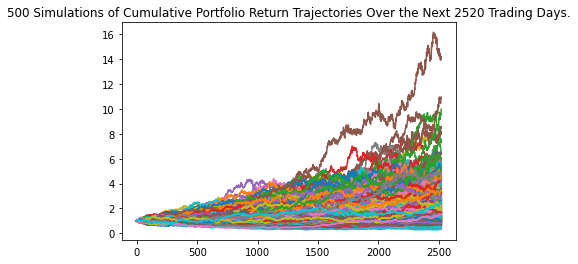

In [80]:
# Visualize the 10-year Monte Carlo simulation with a line plot
MC_sim_line_plot_821 = MC_80_20_split_10_year.plot_simulation()

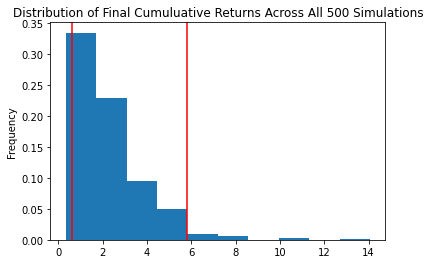

In [81]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation
MC_sim_distribution_821 = MC_80_20_split_10_year.plot_distribution()

In [85]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_summary_stats_821 = MC_80_20_split_10_year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(MC_summary_stats_821)

count           500.000000
mean              2.292188
std               1.567418
min               0.330546
25%               1.220022
50%               1.871666
75%               2.920922
max              14.061576
95% CI Lower      0.636942
95% CI Upper      5.798430
Name: 2520, dtype: float64


### Answer the following questions:

In [83]:
# Print the current balance of the stock and bond portion of the portfolio
print(f"The total value of the stock & bond portion of the portfolio is ${total_stocks_bonds:.2f}")

The total value of the stock & bond portion of the portfolio is $61828.60


In [86]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_stats_821[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_summary_stats_821[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the stock and bond portion of the portfolio with a weight of 80/20 over the next 10 years will end in the range of ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}")

There is a 95% chance that the stock and bond portion of the portfolio with a weight of 80/20 over the next 10 years will end in the range of $39381.21 and $358508.82


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

Weighing the portfolio more heavily to stocks would likely not allow the credit union members to retire early. The 10-year has a low end cumulative return of $39,381.21 whereas the 30-year has a low end cumulative return of $47,098.52. The 10-year and 30-year low ends are relatively close given the large difference in time. The upper end between the 10-year and 30-year is significantly larger though, with the 10-year potentially reaching $358,508.82 and the 30-year potentially reaching $1,076,628.59. The 30-year can potentially make over 3x more cumulative returns over the 10-year. In the end, it is unlikely the members can retire after 10 years.